# Visualizing Simulation Results
### Authors:
##### Justin Tung:      'https://github.com/JayTongue'
##### Matt Adam-Houser: 'https://github.com/mhouser42'

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib
import pickle
import networkx as nx
import ipywidgets
from ipywidgets import widgets

from run_simulation import infestation_main  # Custom function from run_simulation.py
from visualization_functions import *

---------------------------------
----------------------------------
# 1. Running and Visualizing One Simulation

Sample output from one simulation of the infestation code:

`run_mode` types are "Poison ToH", "Population-Based", "Quarantine", or "All"

In [7]:
months_run = 120
run_mode = 'All'
simulation_df = infestation_main(run_mode, months_run) # Change this to change the number of months

{'Cook': <my_classes.County object at 0x000002D8A1C3D480>, 'DuPage': <my_classes.County object at 0x000002D8A1C3F280>, 'Kane': <my_classes.County object at 0x000002D8A1C3E890>, 'Will': <my_classes.County object at 0x000002D8A2F955A0>, 'Winnebago': <my_classes.County object at 0x000002D8A37BD360>, 'Lake': <my_classes.County object at 0x000002D8A37BE3B0>, 'McHenry': <my_classes.County object at 0x000002D8A37BF670>, 'St. Clair': <my_classes.County object at 0x000002D8A37BE980>, 'Kendall': <my_classes.County object at 0x000002D8A37BECB0>, 'Madison': <my_classes.County object at 0x000002D8A37BC460>, 'Rock Island': <my_classes.County object at 0x000002D8A37BD3C0>, 'Peoria': <my_classes.County object at 0x000002D8A37BF940>, 'Sangamon': <my_classes.County object at 0x000002D8A37BFC70>, 'Tazewell': <my_classes.County object at 0x000002D8A37BEE30>, 'Champaign': <my_classes.County object at 0x000002D8A37BCAF0>, 'Boone': <my_classes.County object at 0x000002D8A37BFFA0>, 'Macon': <my_classes.County

,County,month 0,month 1,month 2,month 3,month 4,month 5,month 6,month 7,month 8,...,month 111,month 112,month 113,month 114,month 115,month 116,month 117,month 118,month 119,month 120
0,Cook,0.3,1.233312e-02,1.620512e-03,1.620557e-03,1.620577e-03,3.300000e-01,4.200000e-01,4.209884e-01,4.221601e-01,...,0.000250,0.000223,0.000000,0.110502,0.245113,0.314839,0.378372,0.437604,0.483434,0.499390
1,DuPage,0.0,1.005524e-05,3.612098e-06,3.710278e-06,3.834476e-06,6.421012e-03,1.130616e-02,1.859694e-02,3.459207e-02,...,0.018003,0.016107,0.894308,0.894308,0.869921,0.866888,0.856928,0.850819,0.846142,0.826304
2,Kane,0.1,1.007499e-02,8.491195e-04,8.492252e-04,8.493648e-04,7.594258e-02,8.684030e-02,1.026220e-01,1.173463e-01,...,0.006826,0.006463,0.941731,0.941731,0.941731,0.941731,0.941731,0.941731,0.941731,0.941731
3,Will,0.0,9.174533e-06,1.262413e-06,1.509965e-06,1.781022e-06,9.399395e-03,2.441872e-02,4.200933e-02,5.495475e-02,...,0.000076,0.000119,0.952765,0.952765,0.952765,0.952765,0.952765,0.952765,0.952765,0.952765
4,Winnebago,0.0,0.000000e+00,1.852516e-12,1.866664e-12,1.893618e-12,0.000000e+00,0.000000e+00,2.995624e-07,1.470363e-06,...,0.000707,0.000884,0.977693,0.977693,0.977693,0.977693,0.977693,0.977693,0.977693,0.977693
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,Henderson,0.0,5.773132e-07,3.043778e-08,4.523544e-08,5.147698e-08,0.000000e+00,0.000000e+00,1.522841e-54,6.111102e-47,...,0.006128,0.006248,0.380364,0.479165,0.534462,0.611054,0.665548,0.743708,0.839969,0.929442
98,Calhoun,0.0,0.000000e+00,4.560112e-179,3.767018e-127,3.846042e-125,1.323707e-230,1.194212e-230,1.481910e-116,7.593149e-83,...,0.003202,0.003219,0.139985,0.203668,0.243755,0.317023,0.410082,0.489469,0.540626,0.584945
99,Schuyler,0.0,7.259874e-44,1.159297e-23,3.683735e-20,7.531687e-20,3.360711e-28,2.423219e-28,8.812856e-25,1.408510e-22,...,0.000720,0.000792,0.998818,0.998818,0.998818,0.998818,0.998818,0.998818,0.998818,0.998818
100,Gallatin,0.0,0.000000e+00,1.760219e-16,5.598607e-16,7.421576e-16,0.000000e+00,2.444926e-04,2.028730e-03,5.678482e-03,...,0.000845,0.000848,0.999336,0.999336,0.999336,0.999336,0.999336,0.999336,0.999336,0.999336


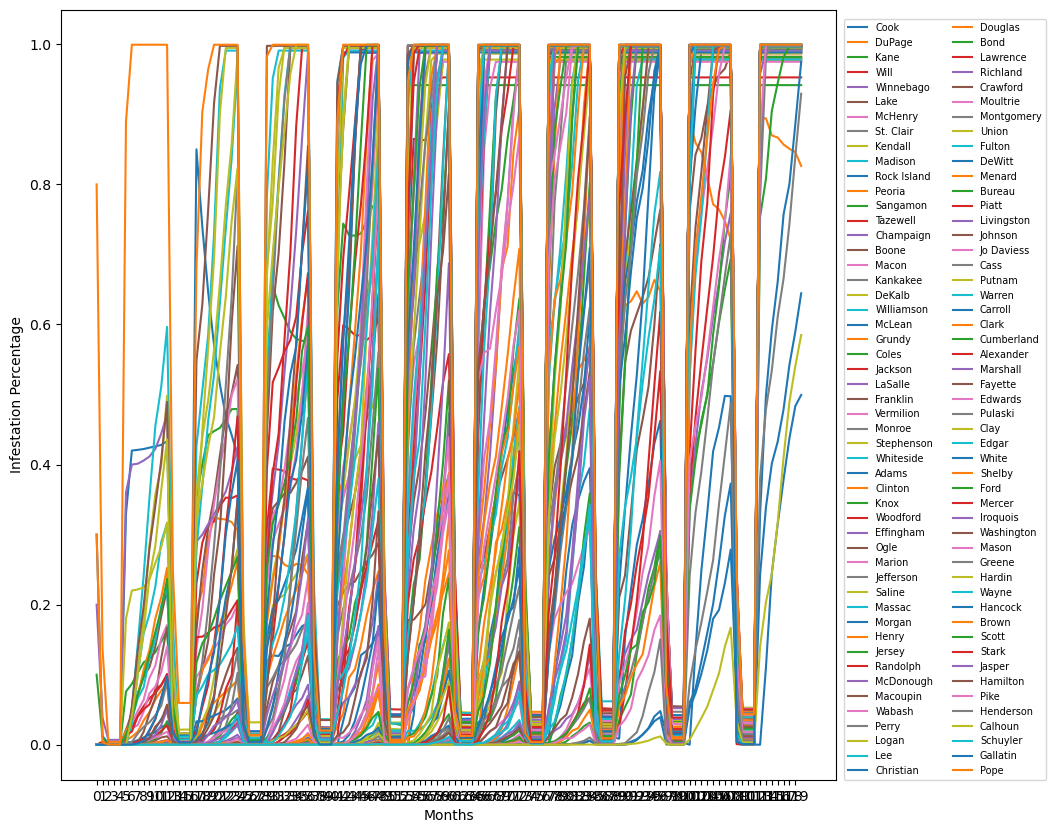

In [8]:
visual_df = make_visual_df(simulation_df)

# Make plots for each county
plt.figure(figsize=(10,10))
for county in visual_df.columns:
    plt.plot(visual_df.index, visual_df[county])
plt.xticks(ticks=range(0, months_run),
    labels=range(0, months_run))
plt.xlabel('Months')
plt.ylabel('Infestation Percentage')
plt.legend(visual_df.columns, loc=(1.01, 0), fontsize=7, ncol=2)
plt.show()

While this graph can display the lanternfly life-cyclem, where adults die in the winter and eggs hatch in the spring, the graph is otherwise is not very helpful. Since there are 102 Counties in Illinois, the resulting graph is messy and visually confusing. 

An alternative way of visualizing this data may be with a sort of heatmap instead

In [9]:
path = 'data/location'
edges = pd.read_csv(f'{path}/county_edges.csv')

CG = pickle.load(open(f'{path}/IL_graph.dat', 'rb'))
handler = pickle.load(open(f'{path}/graph_handler_counties.dat', 'rb'))
highways = pickle.load(open(f'{path}/osmnx_highways.dat', 'rb'))

In [10]:
widgets.interact(make_network_heat,
                 CG=widgets.fixed(CG),
                 handler=widgets.fixed(handler),
                 simulation_df=widgets.fixed(simulation_df),
                 month=widgets.IntSlider(min=0, max=months_run - 1, step=1, layout=widgets.Layout(width='800px')),
)

interactive(children=(IntSlider(value=0, description='month', layout=Layout(width='800px'), max=119), Output()…

<function visualization_functions.make_network_heat(CG, simulation_df, handler, month: int)>

In order to better see the flow of infestations from week to week, we animated the slider:

In [6]:
play = widgets.interact(make_network_heat,
                        CG=widgets.fixed(CG),
                        handler=widgets.fixed(handler),
                        simulation_df=widgets.fixed(simulation_df),month=widgets.Play(value=0,
                                                                                      min=0,
                                                                                      max=months_run - 1,
                                                                                      step=1,
                                                                                      interval=500,
                                                                                      disabled=False,
                                                                                     ))

interactive(children=(Play(value=0, description='month', interval=500, max=119), Output()), _dom_classes=('wid…

Showing the infestation of the state as a whole is more helpful than each individual county:

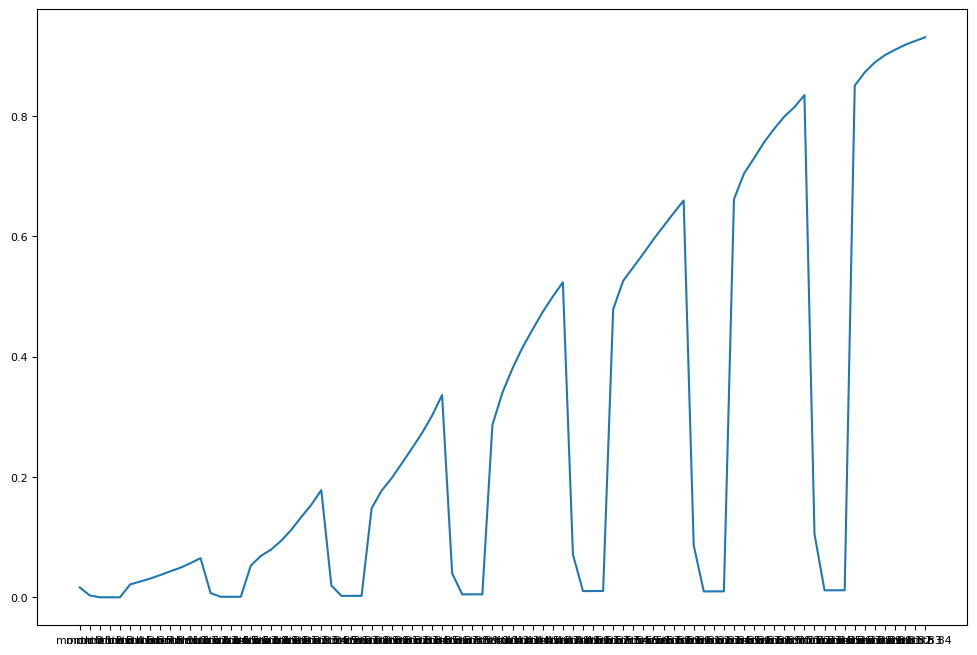

In [7]:
avg_df = visual_df.mean(axis=1)
plt.figure(figsize=(12,8))
plt.plot(avg_df.index, avg_df.iloc[0:, ])
plt.tick_params(labelsize=8)

--------------------------------
# 2. Running the Simulation as a Monte Carlo and Plotting the Results

With this line graph, we can run the simulation as many times as desired and compare the results.

This interactive graph shows different run modes, different experiment durations, and different numbers of simulations.

In [8]:
widgets.interact(model_variables,
    run_mode =['Baseline', 'Poison ToH', 'Population-Based', 'Quarantine', 'All'],
    sims_run = (10, 100, 10),
    sim_months = (1, 60, 1),
    value='Baseline',
    disabled=False,

)

interactive(children=(Dropdown(description='run_mode', options=('Baseline', 'Poison ToH', 'Population-Based', …

<function visualization_functions.model_variables(run_mode: str, sims_run: int, sim_months: int)>

------------------------------------------------
# 3. Model the Impact of a Experimental Variable Manipulation

After running multiple simulations on each model, the resulting average trend lines can be determined for each experimental varaible.

Note that these simulations are extended to 30 months to show longer-term trends.

In [9]:
sims_run = 100  # RIP my RAM
sim_months = 72

all_trends = {}

KeyboardInterrupt: 

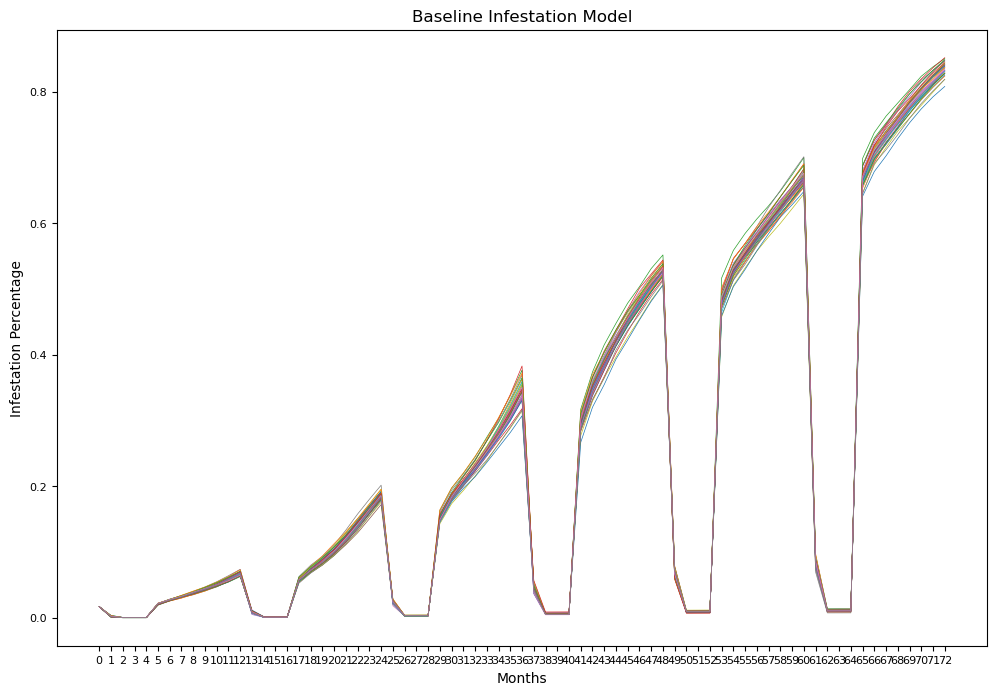

In [10]:
all_trends = model_variables_avg('Baseline', sims_run, sim_months, all_trends)

In [ ]:
all_trends = model_variables_avg('Poison ToH', sims_run, sim_months, all_trends)

In [ ]:
all_trends = model_variables_avg('Population-Based', sims_run, sim_months, all_trends)

In [ ]:
all_trends = model_variables_avg('Quarantine', sims_run, sim_months, all_trends)

In [ ]:
all_trends = model_variables_avg('All', sims_run, sim_months, all_trends)

-----------------------------------------------
# 4. Compare Average Trend Lines to Determine Efficacy of Interventions

By comparing the derived trend lines, the effect of each proposed intervention can be compared.

In [ ]:
fig, ax = plt.subplots(figsize=(15, 10))

plt.xticks(ticks=range(0, sim_months+1),
            labels=range(0, sim_months+1))
plt.xlabel('Months')
plt.ylabel('Infestation Percentage')

for model in all_trends:
    trend_sr = all_trends[model]
    X = trend_sr.index.tolist()
    Y = trend_sr.values.tolist()
    
    ax.plot(X, Y, label=model, linewidth=3)
    ax.fill_between(X, Y, 0, alpha=0.05, interpolate=True)

plt.grid()
plt.legend(fontsize=12)
plt.show()

In [ ]:
all_trends = model_variables_avg('Poison ToH', sims_run, sim_months, all_trends)